# Playing with Spectrograms Using Audio 

- Audio file originally harvested from this youtube video:
    - https://www.youtube.com/watch?v=VbOgj5-rjQQ
- Dropbox share URL:
    - https://www.dropbox.com/s/zqhwyem0wbu1gvw/One%20Hour%203rd%20Eye%20Awakening%20Isochroni.mp3?dl=0
    
    - To use in python change `dl=0` to `dl=1`
    
    
```python
## To download Dropbox file via python
url = 'https://www.dropbox.com/s/zqhwyem0wbu1gvw/One%20Hour%203rd%20Eye%20Awakening%20Isochroni.mp3?dl=1'
import urllib.request
u = urllib.request.urlopen(url)
data = u.read()
u.close()
 
with open('One Hour 3rd Eye Awakening Isochroni.mp3', "wb") as f :
    f.write(data)
    ```

## References

https://analyticsindiamag.com/step-by-step-guide-to-audio-visualization-in-python/

# Code

In [1]:
# !pip install -U fsds
from fsds.imports import *

fsds v0.2.27 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


## Updating Audio to Covid Coughs
- https://github.com/virufy/virufy_data

In [2]:
import os
folder = '/Users/jamesirving/Datasets/virufy_data-main/clinical/'
os.listdir(folder)

['labels.csv', 'original', 'segmented']

In [14]:
folder =  '/Users/jamesirving/Datasets/virufy_data-main/clinical/segmented/'
os.listdir(folder)

['neg', 'pos']

In [19]:
f'{folder}*/*.mp3'

'/Users/jamesirving/Datasets/virufy_data-main/clinical/segmented/*/*.mp3'

In [20]:
import glob
cough_files = glob.glob(f'{folder}*/*.mp3',recursive=True)
len(cough_files)

121

In [22]:
cough_files[0]

'/Users/jamesirving/Datasets/virufy_data-main/clinical/segmented/neg/neg-0421-091-cough-m-47-4.mp3'

In [3]:
df = pd.read_csv(folder+'labels.csv')
df

,date,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms,cough_filename
0,4/21,negative,53,male,"none,",yes,"none,",neg-0421-083-cough-m-53.mp3
1,4/21,positive,50,male,"Congestive heart failure,",no,"Shortness of breath,",pos-0421-084-cough-m-50.mp3
2,4/21,negative,43,male,"none,",no,"Sore throat,",neg-0421-085-cough-m-43.mp3
3,4/21,positive,65,male,"Asthma or chronic lung disease,",no,"Shortness of breath,New or worsening cough,",pos-0421-086-cough-m-65.mp3
4,4/21,positive,40,female,"none,",no,"Sore throat,Loss of taste,Loss of smell,",pos-0421-087-cough-f-40.mp3
5,4/21,negative,66,female,"Diabetes with complications,",no,"none,",neg-0421-088-cough-f-66.mp3
6,4/21,negative,20,female,"none,",no,"none,",neg-0421-089-cough-f-20.mp3
7,4/21,negative,17,female,"none,",no,"Shortness of breath,Sore throat,Body aches,",neg-0421-090-cough-f-17.mp3
8,4/21,negative,47,male,"none,",no,"New or worsening cough,",neg-0421-091-cough-m-47.mp3
9,4/21,positive,53,male,"none,",no,"Fever, chills, or sweating,Shortness of breath...",pos-0421-092-cough-m-53.mp3


## Download & Import File

- url = 'https://www.dropbox.com/s/zqhwyem0wbu1gvw/One%20Hour%203rd%20Eye%20Awakening%20Isochroni.mp3?dl=1'


In [4]:
# url = 'https://www.dropbox.com/s/zqhwyem0wbu1gvw/One%20Hour%203rd%20Eye%20Awakening%20Isochroni.mp3?dl=1'

# import urllib.request
# u = urllib.request.urlopen(url)
# data = u.read()
# u.close()
 
# with open('One Hour 3rd Eye Awakening Isochroni.mp3', "wb") as f :
#     f.write(data)

In [5]:
## Conda install librosa if not installed
%conda install -c conda-forge librosa==0.6.3

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
## Explictly install specific version to fix errors
!pip install llvmlite --user --ignore-installed
!pip install numba==0.48 --user
!pip install "librosa==0.6.3" --user

  Using cached https://files.pythonhosted.org/packages/84/06/09488c0bef4776a4750c5c579b4f0f5ec5ffdfdb6cf8afe1b6aa8f48aed6/llvmlite-0.35.0-cp36-cp36m-macosx_10_9_x86_64.whl
ERROR: numba 0.48.0 has requirement llvmlite<0.32.0,>=0.31.0dev0, but you'll have llvmlite 0.35.0 which is incompatible.
  Using cached https://files.pythonhosted.org/packages/be/e7/35e54bd7718e97cc6c3fcfb9dddbf743d273bb9ce38e4f89a3c6bc9c27a3/llvmlite-0.31.0-cp36-cp36m-macosx_10_9_x86_64.whl
  Found existing installation: llvmlite 0.35.0
    Uninstalling llvmlite-0.35.0:
      Successfully uninstalled llvmlite-0.35.0


In [42]:
import librosa
import librosa.display as ldp
help(librosa.load)

Help on function load in module librosa.core.audio:

load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
    Load an audio file as a floating point time series.
    
    Audio will be automatically resampled to the given rate
    (default `sr=22050`).
    
    To preserve the native sampling rate of the file, use `sr=None`.
    
    Parameters
    ----------
    path : string
        path to the input file.
    
        Any format supported by `audioread` will work.
    
    sr   : number > 0 [scalar]
        target sampling rate
    
        'None' uses the native sampling rate
    
    mono : bool
        convert signal to mono
    
    offset : float
        start reading after this time (in seconds)
    
    duration : float
        only load up to this much audio (in seconds)
    
    dtype : numeric type
        data type of `y`
    
    res_type : str
        resample type (see note)
    
        .. note::
           

In [8]:
librosa.__version__


'0.6.3'

In [9]:
import os
os.listdir()

['output_32_9.png',
 'output_32_8.png',
 'output_21_1.png',
 'One Hour 3rd Eye Awakening Isochroni (1).mp3',
 '.DS_Store',
 'output_25_0.png',
 'output_20_1.png',
 'output_20_2.png',
 'output_32_12.png',
 'README.md',
 'output_32_13.png',
 'output_32_11.png',
 'output_17_1.png',
 '.gitignore',
 'output_32_10.png',
 'output_33_1.png',
 '.gitattributes',
 '.ipynb_checkpoints',
 'playing_with_audio.ipynb',
 'output_16_1.png',
 '.git',
 '.vscode',
 'output_32_3.png',
 'output_32_2.png',
 'output_32_6.png',
 'output_32_7.png',
 'output_36_1.png',
 'output_32_5.png',
 'output_32_4.png',
 'One Hour 3rd Eye Awakening Isochroni.mp3']

In [13]:
# file = 'One Hour 3rd Eye Awakening Isochroni (1).mp3'
# data,sample_rate = librosa.load(librosa.util.example_audio_file())#file, duration=10) # duration = number of seconds

In [23]:
file = cough_files[0]
file

'/Users/jamesirving/Datasets/virufy_data-main/clinical/segmented/neg/neg-0421-091-cough-m-47-4.mp3'

In [25]:
# file = 'One Hour 3rd Eye Awakening Isochroni (1).mp3'
data,sample_rate = librosa.load(file) # duration = number of seconds

In [26]:
sample_rate

22050

In [27]:
dp.Audio(data=data,rate=sample_rate)

In [32]:
duration = len(data)/sample_rate
duration

1.5998639455782313

In [31]:
len(data)

35277

In [ ]:
## How many secs
nsec = int(len(data)/sample_rate)

In [38]:
sec = np.linspace(0,duration,len(data))
sec.shape

(35277,)

In [40]:
df = pd.DataFrame({'Sec':sec,'Audio':data})
# df['Sec'] = pd.to_datetime()
df

,Sec,Audio
0,0.000000,0.375695
1,0.000045,0.712474
2,0.000091,0.663853
3,0.000136,0.668612
4,0.000181,0.558071
...,...,...
35272,1.599683,0.000000
35273,1.599728,0.000000
35274,1.599773,0.000000
35275,1.599819,0.000000


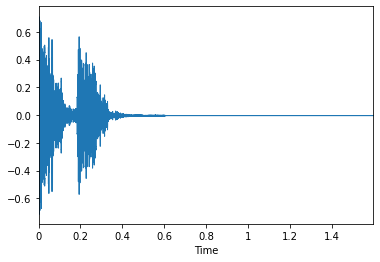

In [43]:
ldp.waveplot(data,sr=sample_rate, max_points=50000.0,x_axis='time')

# help(librosa.display.waveplot)

[(0.0, 0.5)]

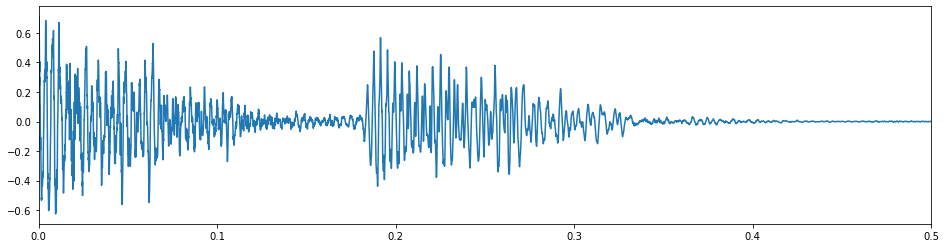

In [45]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(sec,data)
ax.set(xlim=(0,0.5))

In [46]:
len(data)

35277

## Spectograms - MATPLOTLIB

(0.0, 0.7)

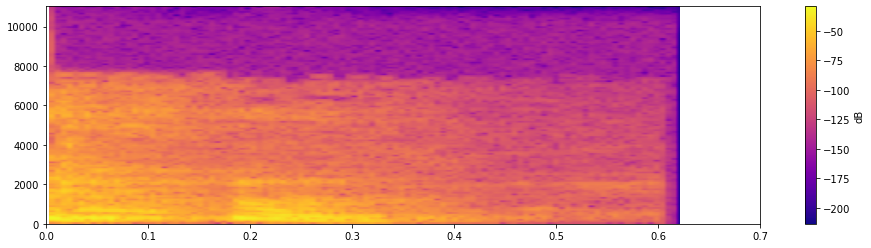

In [53]:
## With matplotlib
fig, ax = plt.subplots(figsize=(16,4))
spec, freqs, t, m  = plt.specgram(data,scale='dB',#noverlap=128,
                                  Fs=sample_rate,NFFT=256,mode='psd',
                                  cmap='plasma',)
c =plt.colorbar(label='dB')
ax.set_xlim(0,0.7)
# ax.set_ylim(0,1000)

(0.0, 0.7)

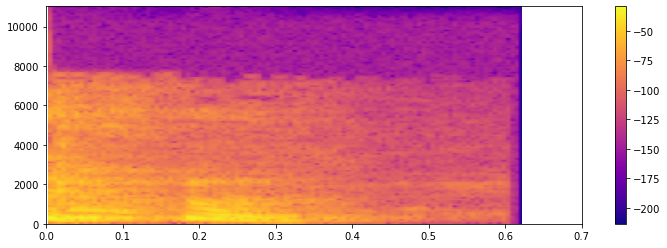

In [56]:
## Limiting cmap
fig, ax = plt.subplots(figsize=(12,4))
spec, freqs, t, m  = plt.specgram(data,scale='dB',#noverlap=128,
                                  Fs=sample_rate,NFFT=256,mode='psd',
                                  cmap='plasma',)
plt.colorbar()
ax.set_xlim(0,0.7)

In [57]:
help(plt.specgram)

Help on function specgram in module matplotlib.pyplot:

specgram(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None, scale=None, vmin=None, vmax=None, *, data=None, **kwargs)
    Plot a spectrogram.
    
    Compute and plot a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the spectrum of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*. The spectrogram is plotted as a colormap
    (using imshow).
    
    Parameters
    ----------
    x : 1-D array or sequence
        Array or sequence containing the data.
    
    Fs : float, default: 2
        The sampling frequency (samples per time unit).  It is used to calculate
        the Fourier frequencies, *freqs*, in cycles per time unit.
    
    window : callable or ndarray, default: `.

In [58]:
def test_func(data, scale='db'):
    args = locals()
    args.pop('data')
    print(args.keys())
    return args
test_func(data)

dict_keys(['scale'])


{'scale': 'db'}

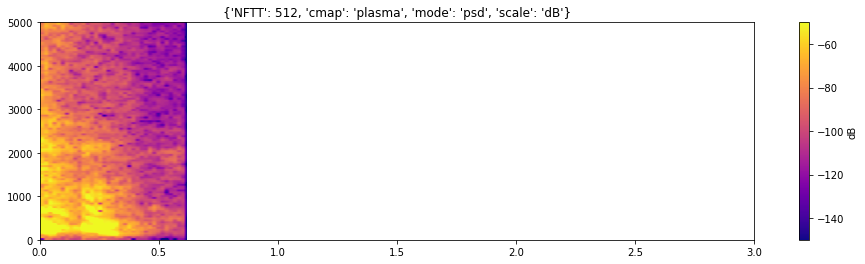

In [59]:
## With matplotlib
def plot_spectrogram(data,scale='dB',mode='psd',cmap='plasma',NFTT=512):
    """scale=['default','linear','dB']
    mode= ['default', 'psd', 'magnitude', 'angle', 'phase']
    """
    args = locals()
    args.pop('data')
    
    fig, ax = plt.subplots(figsize=(16,4))
    spec, freqs, t, m  = plt.specgram(data,scale=scale,#noverlap=128,
                                      Fs=sample_rate,NFFT=NFTT,mode=mode,
                                      cmap=cmap,)
    res = dict(spec=spec, freqs=freqs, t=t, m=m)
    plt.colorbar(label=scale)
    plt.clim(vmin=-150,vmax=-50)
    ax.set_xlim(0,3)
    ax.set_ylim(0,5000)
    ax.set_title(str(args))#f"Scale={scale}, mode={mode},cmap={cmap}")
    return res,fig,ax
res,fig,ax = plot_spectrogram(data)

In [60]:
def make_grid(just_dict=False,**kwargs):
    
    params = dict(kwargs)
    if just_dict:
        return params
    else:
        param_combs = list(itertools.product(*[*params.values()]))

        return params,param_combs

def make_kws(combs,params):#:,param_combs):
    params_list = []
    for comb in combs:
        param_dict = dict(zip(params.keys(),comb))
        params_list.append(param_dict)
    return params_list

In [61]:
## PARAMS
scales =['dB']#'linear','default',
modes = ['default', 'psd', 'magnitude']# 'angle', 'phase']
NFTTs = [128,256,512,1024]

params = make_grid(just_dict=True,scale =scales, mode = modes,NFTT = NFTTs)
params

{'scale': ['dB'],
 'mode': ['default', 'psd', 'magnitude'],
 'NFTT': [128, 256, 512, 1024]}

In [62]:
import itertools
params,combs = make_grid(just_dict=False,scale =scales, mode = modes,NFTT = NFTTs)
params,combs

({'scale': ['dB'],
  'mode': ['default', 'psd', 'magnitude'],
  'NFTT': [128, 256, 512, 1024]},
 [('dB', 'default', 128),
  ('dB', 'default', 256),
  ('dB', 'default', 512),
  ('dB', 'default', 1024),
  ('dB', 'psd', 128),
  ('dB', 'psd', 256),
  ('dB', 'psd', 512),
  ('dB', 'psd', 1024),
  ('dB', 'magnitude', 128),
  ('dB', 'magnitude', 256),
  ('dB', 'magnitude', 512),
  ('dB', 'magnitude', 1024)])

In [63]:
combs

[('dB', 'default', 128),
 ('dB', 'default', 256),
 ('dB', 'default', 512),
 ('dB', 'default', 1024),
 ('dB', 'psd', 128),
 ('dB', 'psd', 256),
 ('dB', 'psd', 512),
 ('dB', 'psd', 1024),
 ('dB', 'magnitude', 128),
 ('dB', 'magnitude', 256),
 ('dB', 'magnitude', 512),
 ('dB', 'magnitude', 1024)]

In [64]:
# test = [*params.values()]
# list(itertools.product(*test))

# list(itertools.product(*test))

In [65]:
params_kws = make_kws(combs,params)
params_kws

[{'scale': 'dB', 'mode': 'default', 'NFTT': 128},
 {'scale': 'dB', 'mode': 'default', 'NFTT': 256},
 {'scale': 'dB', 'mode': 'default', 'NFTT': 512},
 {'scale': 'dB', 'mode': 'default', 'NFTT': 1024},
 {'scale': 'dB', 'mode': 'psd', 'NFTT': 128},
 {'scale': 'dB', 'mode': 'psd', 'NFTT': 256},
 {'scale': 'dB', 'mode': 'psd', 'NFTT': 512},
 {'scale': 'dB', 'mode': 'psd', 'NFTT': 1024},
 {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 128},
 {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 256},
 {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 512},
 {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 1024}]

Error with {'scale': 'dB', 'mode': 'default', 'NFTT': 128}
Error with {'scale': 'dB', 'mode': 'psd', 'NFTT': 128}
Error with {'scale': 'dB', 'mode': 'magnitude', 'NFTT': 128}


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7560: RuntimeWarning:

divide by zero encountered in log10



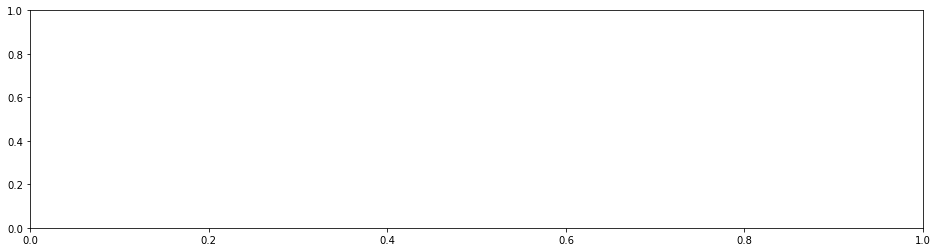

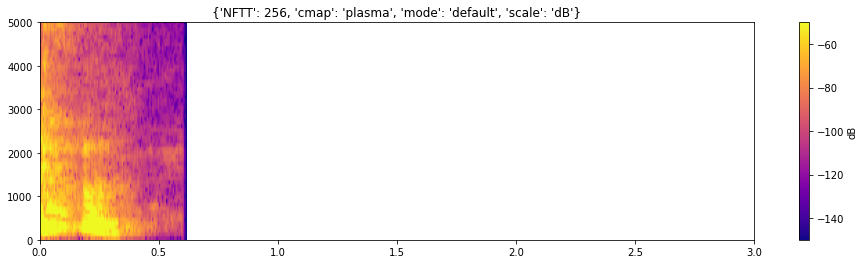

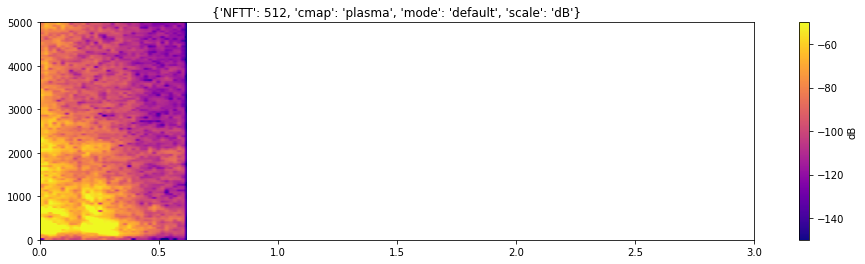

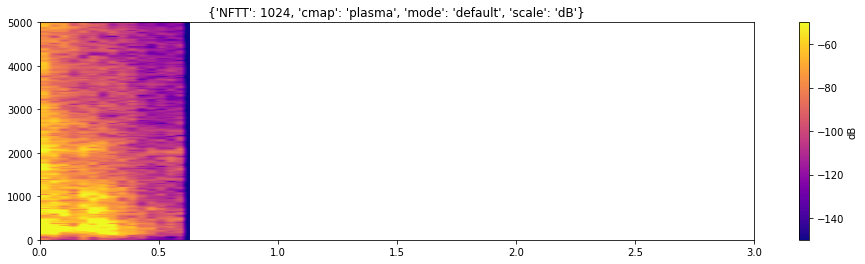

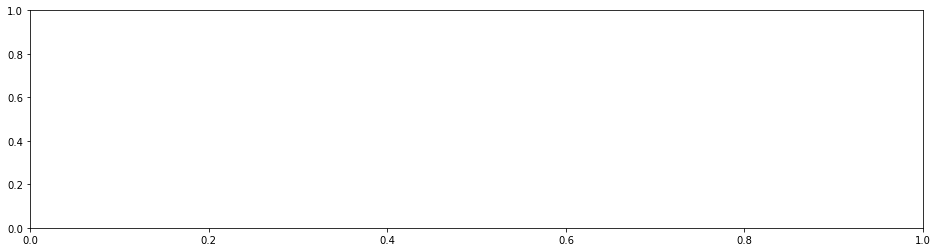

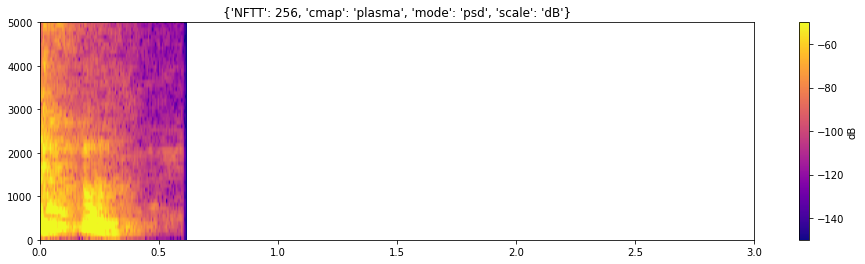

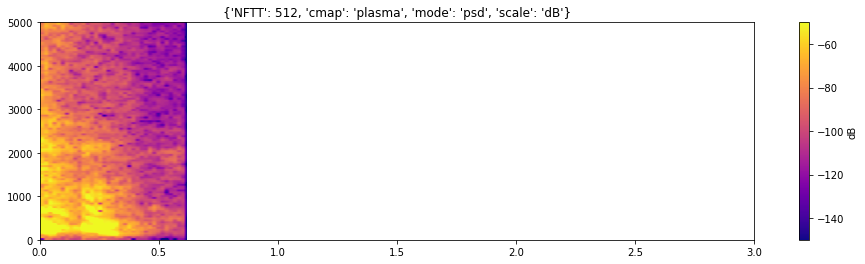

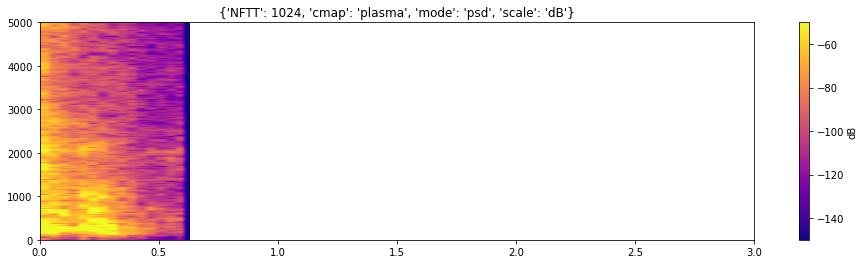

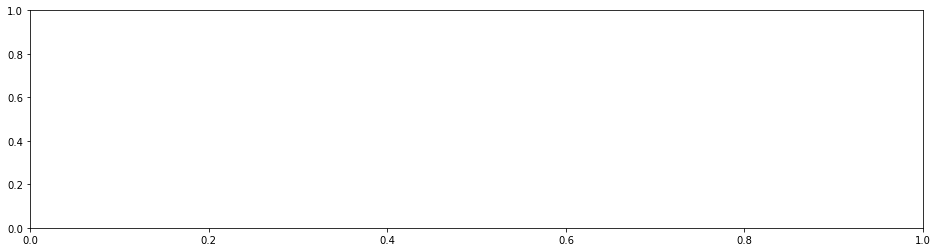

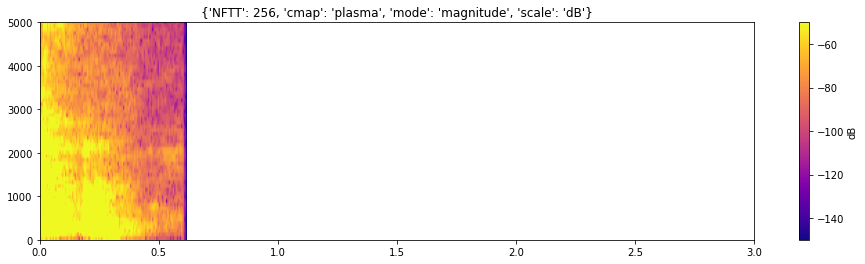

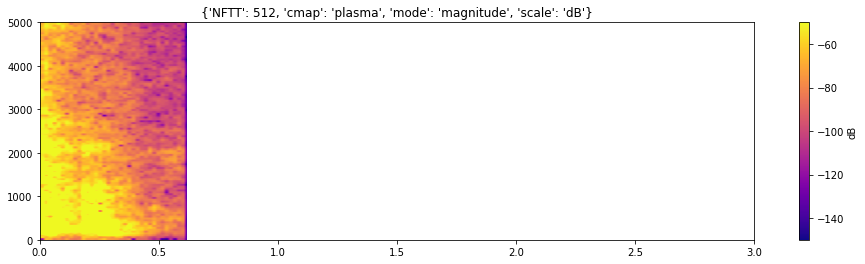

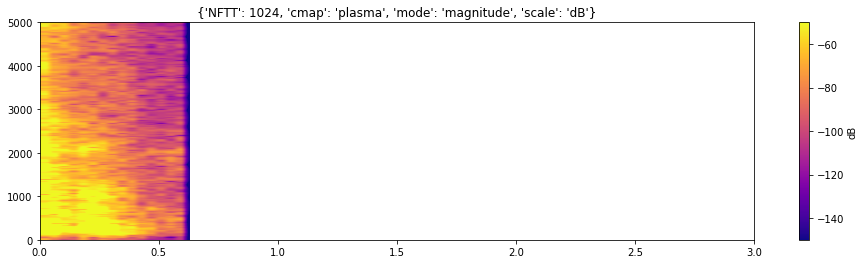

In [66]:
for kws in params_kws:
    try:
        res,fig,ax = plot_spectrogram(data,**kws)
    except Exception as e:
        print(f"Error with {kws}")

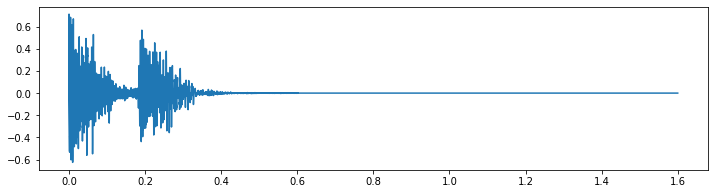

In [67]:
fig,ax=plt.subplots(figsize=(12,3))
plt.plot(sec,data)

### With Scipy

In [ ]:
import scipy.signal as sig
import scipy.fft as fft

f,t,Sxx  = sig.spectrogram(data,nfft=512,fs=sample_rate,scaling='spectrum')#1000)
f.shape,t.shape,Sxx.shape

In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
plt.imshow(Sxx,cmap='plasma')#,vmin=Sxx.min(),vmax=Sxx.max())
# ax.set_xticklabels(t.round(3))
# ax.set_yticklabels(f.round(3))